# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.24.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2057447
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set

good_to_go=False
while not good_to_go:

    permutation = np.random.permutation(X.shape[0])

    X = X[permutation]
    y = y[permutation]

    m_training = 600
    m_test = 4000

    X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
    y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

    labels, freqs = np.unique(y_train, return_counts=True)
    print("Labels in training dataset: ", labels)
    print("Frequencies in training dataset: ", freqs)

    labelsT, freqsT = np.unique(y_test, return_counts=True)
    print("Labels in test set: ", labelsT)
    print("Frequencies in test set: ", freqsT)

    if True not in ((freqs < 10) & (freqsT<10)):
        good_to_go = True



Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [53 71 62 63 55 44 58 70 69 55]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [53 71 62 63 55 44 58 70 69 55]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


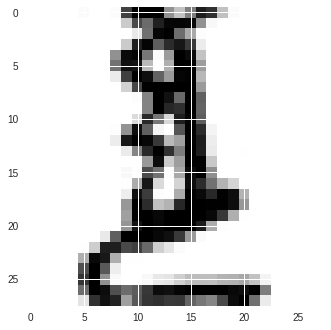

LABEL: 8
INPUT:


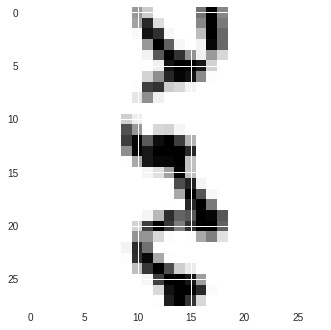

LABEL: 1
INPUT:


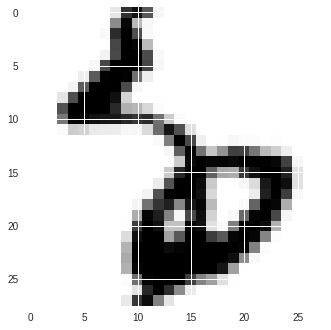

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10),(40,20,) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)


model=GridSearchCV(mlp,parameters,cv=5)
model.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(model.best_params_)

print("Score with best parameters:")
print(model.best_score_)

print("\nAll scores on the grid:")

for params,score,std,train_time in zip(model.cv_results_["params"],model.cv_results_["mean_test_score"],model.cv_results_["std_test_score"],model.cv_results_["mean_fit_time"]):
    print("Parameters: ",params)
    print("Mean test score: {:.2} +- {:.2}".format(score,std))
    print("Mean training time: {} s".format(train_time))

/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40, 20)}
Score with best parameters:
0.7799999999999999

All scores on the grid:
Parameters:  {'hidden_layer_sizes': (10,)}
Mean test score: 0.73 +- 0.042
Mean training time: 0.12768177986145018 s
Parameters:  {'hidden_layer_sizes': (20,)}
Mean test score: 0.76 +- 0.025
Mean training time: 0.10362539291381836 s
Parameters:  {'hidden_layer_sizes': (40,)}
Mean test score: 0.78 +- 0.024
Mean training time: 0.127616024017334 s
Parameters:  {'hidden_layer_sizes': (20, 20)}
Mean test score: 0.74 +- 0.024
Mean training time: 0.0938760757446289 s
Parameters:  {'hidden_layer_sizes': (40, 20, 10)}
Mean test score: 0.65 +- 0.014
Mean training time: 0.17801012992858886 s
Parameters:  {'hidden_layer_sizes': (40, 20)}
Mean test score: 0.78 +- 0.023
Mean training time: 0.12114877700805664 s


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 240,480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp_best = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,hidden_layer_sizes=(40,20,)) # best topology was 40,20 neurons

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

model_batches = GridSearchCV(mlp_best,parameters,cv=kf)
model_batches.fit(X_train,y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(model_batches.best_params_)

print("Score with best parameters:")
print(model_batches.best_score_)

print("\nAll scores on the grid:")
for params,score,std,train_time in zip(model_batches.cv_results_["params"],model_batches.cv_results_["mean_test_score"],model_batches.cv_results_["std_test_score"],model_batches.cv_results_["mean_fit_time"]):
    print("Parameters: ",params)
    print("Mean test score: {:.2} +- {:.2}".format(score,std))
    print("Mean training time: {} s".format(train_time))

/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'batch_size': 480}
Score with best parameters:
0.7633333333333333

All scores on the grid:
Parameters:  {'batch_size': 1}
Mean test score: 0.1 +- 0.029
Mean training time: 9.475851392745971 s
Parameters:  {'batch_size': 32}
Mean test score: 0.64 +- 0.072
Mean training time: 0.13552002906799315 s
Parameters:  {'batch_size': 240}
Mean test score: 0.76 +- 0.032
Mean training time: 0.08990359306335449 s
Parameters:  {'batch_size': 480}
Mean test score: 0.76 +- 0.019
Mean training time: 0.11925253868103028 s


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

A more complicated network topology results in a lot more weights to optimize thus slowing the training process, unless the simpler network fails to converge and runs for all the iterations allowed. SGD also fails to converge (again wasting time) when choosing batches size much smaller than the whole training dataset, since it causes the algorithm to "wander" around the weights space and to struggle finding a minima.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.15 sec

Training MLP of size (20,) ...


/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.12 sec

Training MLP of size (40,) ...
Done, training time: 0.14 sec

Training MLP of size (20, 20) ...
Done, training time: 0.11 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.14 sec

Training MLP of size (40, 20) ...
Done, training time: 0.13 sec



<ipython-input-10-d8576cf13252>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hl_sizes = np.array(hl_sizes)[p]


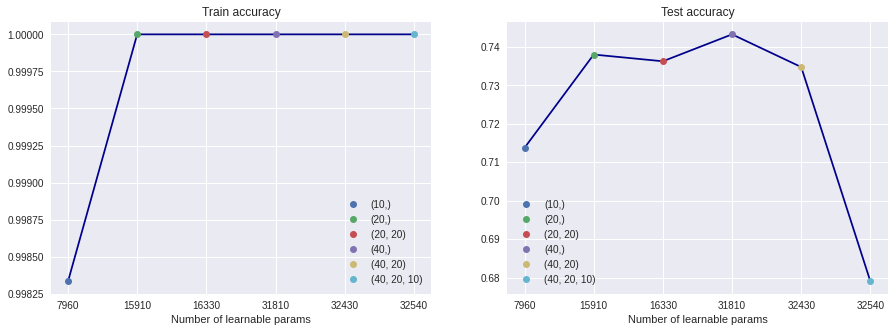

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10),(40,20,)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,hidden_layer_sizes=hl_size,batch_size=480) #optimal batch_size found in the previous code block
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()


# they are not sorted by ascending value lets fix that
hl_labels=np.array(hl_labels)
p=hl_labels.argsort()
hl_sizes = np.array(hl_sizes)[p]
hl_labels=hl_labels[p]
train_acc_list=np.array(train_acc_list)[p]
test_acc_list=np.array(test_acc_list)[p]




fig, ax = plt.subplots(1,2, figsize=(15,5))






ax[0].plot(train_acc_list,color='darkblue')
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list,color='darkblue')
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)

for topology,train_acc,test_acc,x in zip(hl_sizes,train_acc_list,test_acc_list,np.arange(0,len(hl_sizes))):
    ax[0].plot(x,train_acc,'o',label=str(topology))
    ax[1].plot(x,test_acc,'o',label=str(topology))

ax[0].legend()
ax[1].legend()

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

As we can see from the plots, a large number of learnable parameters can lead to overfitting, as they end up interpolating too precisely the training set's classification function without generalizing the result properly. A good balance can be found in the middle part of the spectrum.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
0.2
Score with best parameters:
0.74525


/home/zano/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


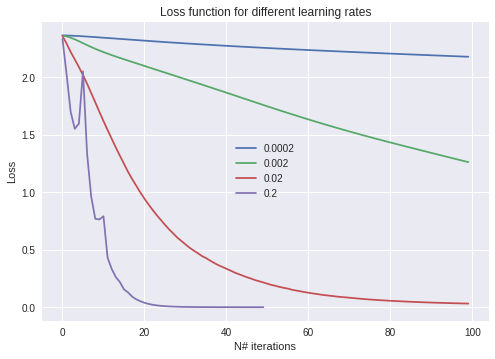

In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}

#ADD YOUR CODE
best_batch_size = 480
best_topology = (40,20,)

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,hidden_layer_sizes=best_topology,batch_size=best_batch_size)

fig,ax = plt.subplots()

#we will have to ditch gridsearchcv and kfold validation because we can't access loss_curve_ attribute from them
for lr in lr_list:
    mlp.learning_rate_init=lr
    mlp.fit(X_train,y_train)
    scores[lr]=mlp.score(X_test,y_test)
    ax.plot(mlp.loss_curve_,label=str(lr))


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(max(scores, key=scores.get))


print("Score with best parameters:")
print(scores[max(scores, key=scores.get)])

ax.set_title("Loss function for different learning rates")
ax.set_ylabel("Loss")
ax.set_xlabel("N# iterations")
ax.legend()
plt.show()


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The smaller learning rates correspond to a slower convergence to a minimum, actually failing to do so within the 100 iterations limit. A bigger learning rate means bigger steps during the gradient descent, often overshooting the "valleys" of the loss function's landscape and failing to converge in a uniform fashion but eventually managing to land near a minimum faster than the other learning rates could.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training score: 1.000000
Best NN test score: 0.745250


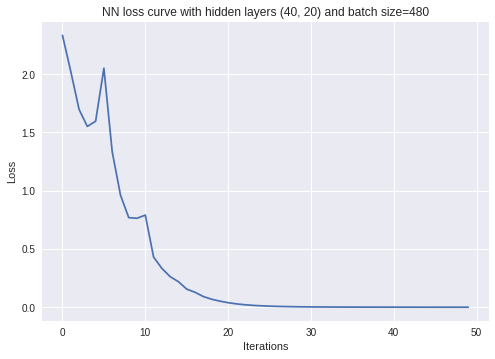

In [12]:
#get training and test score for the best NN model from CV

mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.2,hidden_layer_sizes=best_topology,batch_size=best_batch_size)

mlp.fit(X_train,y_train)
training_score = mlp.score(X_train,y_train)
test_score = mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training score: %f" % training_score)
print ("Best NN test score: %f" % test_score)

fig,ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_title('NN loss curve with hidden layers {} and batch size={}'.format(best_topology,best_batch_size))
ax.set_ylabel("Loss")
ax.set_xlabel("Iterations")
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [350 386 394 385 412 426 371 452 426 398]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

Iteration 1, loss = 1.90169029
Iteration 2, loss = 2.50047711
Iteration 3, loss = 1.39850518
Iteration 4, loss = 0.93746082
Iteration 5, loss = 0.66175965
Iteration 6, loss = 0.52975220
Iteration 7, loss = 0.43123875
Iteration 8, loss = 0.36018868
Iteration 9, loss = 0.31818591
Iteration 10, loss = 0.27364913
Iteration 11, loss = 0.23605846
Iteration 12, loss = 0.20541396
Iteration 13, loss = 0.17898361
Iteration 14, loss = 0.16114074
Iteration 15, loss = 0.14468026
Iteration 16, loss = 0.12233739
Iteration 17, loss = 0.10350049
Iteration 18, loss = 0.09194435
Iteration 19, loss = 0.08305441
Iteration 20, loss = 0.07703499
Iteration 21, loss = 0.07631731
Iteration 22, loss = 0.06079468
Iteration 23, loss = 0.05369866
Iteration 24, loss = 0.04984988
Iteration 25, loss = 0.04341837
Iteration 26, loss = 0.03903523
Iteration 27, loss = 0.03761551
Iteration 28, loss = 0.03255486
Iteration 29, loss = 0.02998870
Iteration 30, loss = 0.02799029
Iteration 31, loss = 0.02567172
Iteration 32, los

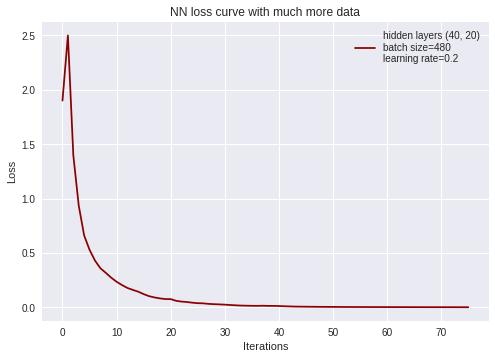

In [14]:
# use best architecture and params from before

mlp_large = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.2,hidden_layer_sizes=best_topology,batch_size=best_batch_size,verbose=True)

mlp_large.fit(X_train,y_train)
NN_training_score = mlp_large.score(X_train,y_train)
NN_test_score = mlp_large.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN with MUCH MORE DATA\n')

print ("Best NN training score: %f" % NN_training_score)
print ("Best NN test score: %f" % NN_test_score)

fig,ax = plt.subplots()
ax.plot(mlp_large.loss_curve_,color='darkred',label='hidden layers {}\nbatch size={}\nlearning rate={}'.format(best_topology,best_batch_size,0.2))
ax.set_title('NN loss curve with much more data')
ax.set_ylabel("Loss")
ax.set_xlabel("Iterations")
ax.legend()
plt.show()


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

A larger training dataset as expected results in a much more generalizable trained predictor, eventually improving the test accuracy.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

Sample n#1 that was misclassified by the NN trained with less data but correctly classified when trained with more data: 
INPUT:


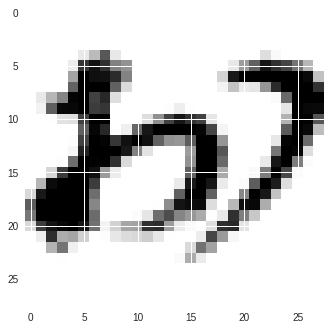

LABEL: 0
Less data NN label prediction: [8]
More data NN label prediction: [0]


In [15]:
X_misclassified=X_test[(mlp.predict(X_test) != y_test) & (mlp_large.predict(X_test)==y_test)]
y_misclassified=y_test[(mlp.predict(X_test) != y_test) & (mlp_large.predict(X_test)==y_test)]

print("Sample n#1 that was misclassified by the NN trained with less data but correctly classified when trained with more data: ")
plot_input(X_misclassified,y_misclassified,0)
print("Less data NN label prediction: {}".format(mlp.predict(X_misclassified[0].reshape(1,-1))))
print("More data NN label prediction: {}".format(mlp_large.predict(X_misclassified[0].reshape(1,-1))))
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


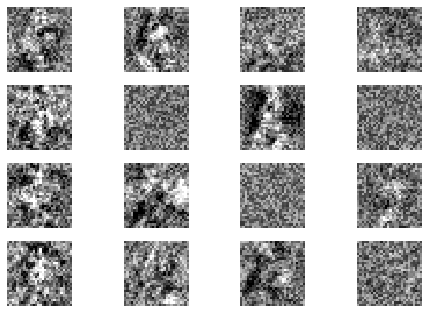

Weights with 4000 data points:


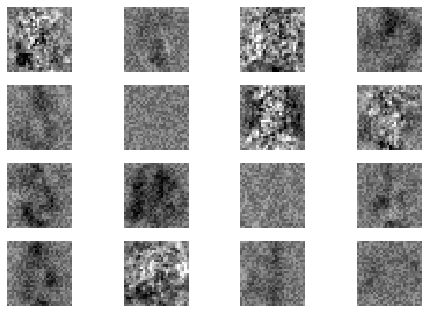

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

These images show the weights that activate each neuron of the first hidden layer starting from the pixels themselves; ideally, they should be able to recognize patterns (at least from a human point of view that's what we would expect in the process of classification) like vertical lines, circles and such. This doesn't happen, either because the model found a different minimum of the parameters, or the topology is wrongly designed, or the optimal learning process just isn't what we would expect as humans. One thing we can notice is that training with more data results in some neurons of the first layer receiving a more "blurred" input, meaning that those particular neurons are less affected by the input and are probably redundant in some way, thus suggesting that the optimal architeture is yet to be found.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_SVM = SVC(kernel='rbf',C=10,gamma=0.01)
best_SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_score =  best_SVM.score(X_train,y_train)
SVM_test_score =  best_SVM.score(X_test,y_test)

print("Training score SVM:")
print(SVM_training_score)

print("Test score SVM:")
print(SVM_test_score)

RESULTS FOR SVM
Training score SVM:
1.0
Test score SVM:
0.9186


In [18]:
from sklearn import linear_model

logreg=linear_model.LogisticRegression(C=1.,max_iter=10000)

# you can re-use your code from Lab 2

X_train_norm=sklearn.preprocessing.StandardScaler().fit_transform(X_train)
X_test_norm=sklearn.preprocessing.StandardScaler().fit_transform(X_test)

logreg.fit(X_train_norm,y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

logreg_training_score = logreg.score(X_train_norm,y_train)
logreg_test_score = logreg.score(X_test_norm,y_test)

print ("Best logistic regression training score: {}".format(logreg_training_score))
print ("Best logistic regression test score: {}".format(logreg_test_score))


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Best logistic regression training score: 0.9992
Best logistic regression test score: 0.726


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]
As we can see from the table below SVM still holds as the model that performs better with test samples. NNs may be able to encode even better the complexity of the classification rule, but are also harder to design; as already mentioned, the architecture found may simply not be the best one and lots of parameters also mean a more complex loss function landscape with harder to find minima.

In [19]:
results=pd.DataFrame.from_dict({
    "Train score" : [NN_training_score,SVM_training_score,logreg_training_score],
    "Test score" : [NN_test_score,SVM_test_score,logreg_test_score]
},orient='index',columns=['NN','SVM','LogReg'])

results

,NN,SVM,LogReg
Train score,1.000,1.0000,0.9992
Test score,0.807,0.9186,0.7260
